In [1]:
# os.environ["JAX_PLATFORMS"] = "cpu"

In [2]:
import jax
import numpy as np
from mrfx.experiments import time_complete_sampling, plot_benchmark
from mrfx.samplers import ChromaticGibbsSampler
from mrfx.models import Potts

key = jax.random.PRNGKey(0)

K = 2
beta = 1.0
potts_model = Potts(K=K, beta=beta, neigh_size=1)

Ks = np.arange(2, 8)
sizes = [(2**e, 2**e) for e in range(4, 10)]
reps = 10

key, subkey = jax.random.split(key, 2)
times, n_iterations, samples, energy = time_complete_sampling(
    ChromaticGibbsSampler,
    Potts,
    subkey,
    Ks,
    sizes,
    reps,
    kwargs_sampler={
        "eps": 0.05,
        "max_iter": 10000,
        "color_update_type": "vmap_in_color",
    },
    kwargs_model={"beta": beta},
    exp_name="Gibbs_sampler_GPU",
    with_energy=True
)

[2025-09-04 17:25:34,652] [zeus.device.gpu.nvidia](nvidia.py:47) pynvml is available and initialized.
[2025-09-04 17:25:34,659] [zeus.device.cpu.rapl](rapl.py:137) RAPL directory (/sys/class/powercap/intel-rapl) is available.
[2025-09-04 17:25:34,660] [zeus.monitor.energy](energy.py:223) Monitoring GPU indices [0].
[2025-09-04 17:25:34,661] [zeus.monitor.energy](energy.py:224) Monitoring CPU indices []
Rep ( / 10): 

/home/hugo/Documents/recherche/gum/code/mrfx/mrfx/experiments/_benchmark.py:208: UserWarning: A JAX array is being set as static! This can result in unexpected behavior and is usually a mistake to do.
  model = Model(K=k, **kwargs_model)


Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
[2025-09-04 17:25:37,724] [zeus.utils.framework](framework.py:47) JAX with CUDA support is available.
Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
1 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
2 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
3 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
4 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
5 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
6 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
7 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
8 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
9 Stopping chromatic Gibbs sampler, cause: Convergence criterion is reached
10 
k=np.int64(2), lx=16, ly=16, compilation_time=3.06124711036682

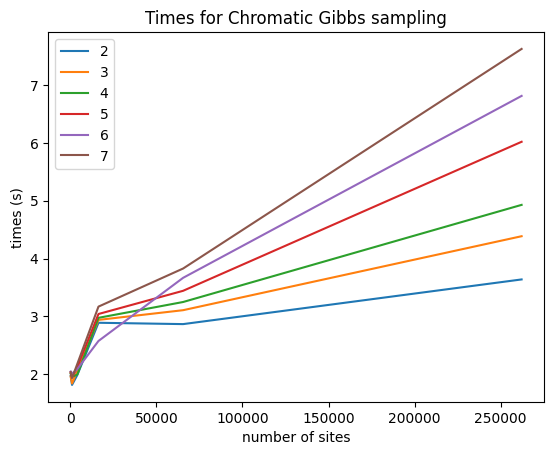

In [3]:
plot_benchmark(Ks, sizes, times, title="Times for Chromatic Gibbs sampling", ylabel="times (s)")

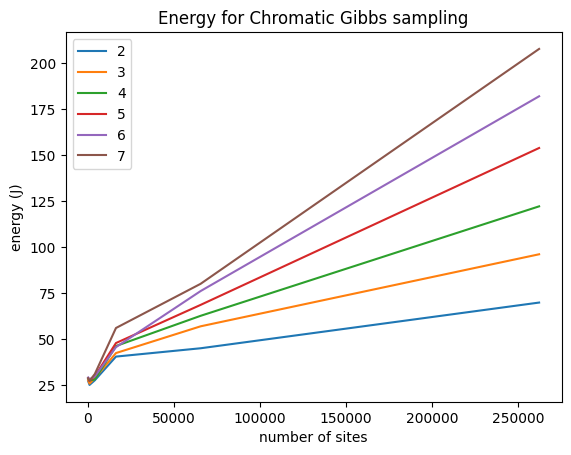

In [4]:
plot_benchmark(Ks, sizes, energy, title="Energy for Chromatic Gibbs sampling", ylabel="energy (J)")